In [0]:
import pandas as pd
import zipfile
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from google.colab import drive  #importing file from local drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
basics_title = pd.read_csv(r'/content/drive/My Drive//title.basics.tsv.gz', sep = '\t') #reading the file
basics_title.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [4]:
basics_reqd = basics_title[['tconst','genres']] #taking only required columns
basics_reqd

,tconst,genres
0,tt0000001,"Documentary,Short"
1,tt0000002,"Animation,Short"
2,tt0000003,"Animation,Comedy,Romance"
3,tt0000004,"Animation,Short"
4,tt0000005,"Comedy,Short"
...,...,...
6796788,tt9916848,"Action,Drama,Family"
6796789,tt9916850,"Action,Drama,Family"
6796790,tt9916852,"Action,Drama,Family"
6796791,tt9916856,Short


In [5]:
basics_reqd = basics_reqd.dropna() #dropping null values
basics_reqd

,tconst,genres
0,tt0000001,"Documentary,Short"
1,tt0000002,"Animation,Short"
2,tt0000003,"Animation,Comedy,Romance"
3,tt0000004,"Animation,Short"
4,tt0000005,"Comedy,Short"
...,...,...
6796788,tt9916848,"Action,Drama,Family"
6796789,tt9916850,"Action,Drama,Family"
6796790,tt9916852,"Action,Drama,Family"
6796791,tt9916856,Short


In [0]:
b = pd.DataFrame(basics_reqd.genres.str.split(',').tolist(), index=basics_reqd.tconst).stack() #splitting the multiple genre under one tconst
b = b.reset_index()[['tconst',0]] #new variable after splitting named as 0
b.columns = [ 'tconst', 'genres'] #renaming 0 to genre

In [7]:
basics_reqd = b
basics_reqd

,tconst,genres
0,tt0000001,Documentary
1,tt0000001,Short
2,tt0000002,Animation
3,tt0000002,Short
4,tt0000003,Animation
...,...,...
10825665,tt9916852,Family
10825666,tt9916856,Short
10825667,tt9916880,Animation
10825668,tt9916880,Comedy


In [8]:
ratings_title = pd.read_csv(r'https://datasets.imdbws.com/title.ratings.tsv.gz', sep = '\t') #reading the ratings file
ratings_title

,tconst,averageRating,numVotes
0,tt0000001,5.6,1614
1,tt0000002,6.0,198
2,tt0000003,6.5,1295
3,tt0000004,6.1,121
4,tt0000005,6.1,2069
...,...,...,...
1039880,tt9916576,6.0,9
1039881,tt9916578,8.5,18
1039882,tt9916720,5.7,51
1039883,tt9916766,6.8,13


In [9]:
vote=ratings_title.drop(['averageRating'],axis=1) #dropping average rating that is not required
vote

,tconst,numVotes
0,tt0000001,1614
1,tt0000002,198
2,tt0000003,1295
3,tt0000004,121
4,tt0000005,2069
...,...,...
1039880,tt9916576,9
1039881,tt9916578,18
1039882,tt9916720,51
1039883,tt9916766,13


In [10]:
genre_vote = basics_reqd.merge(vote) #merging vote with genres
genre_vote

,tconst,genres,numVotes
0,tt0000001,Documentary,1614
1,tt0000001,Short,1614
2,tt0000002,Animation,198
3,tt0000002,Short,198
4,tt0000003,Animation,1295
...,...,...,...
2035933,tt9916720,Horror,51
2035934,tt9916720,Mystery,51
2035935,tt9916766,Family,13
2035936,tt9916766,Reality-TV,13


In [11]:
genre_vote=genre_vote.drop(['tconst'],axis=1) #dropping tconst which is not required
genre_vote

,genres,numVotes
0,Documentary,1614
1,Short,1614
2,Animation,198
3,Short,198
4,Animation,1295
...,...,...
2035933,Horror,51
2035934,Mystery,51
2035935,Family,13
2035936,Reality-TV,13


In [12]:
genre_vote=genre_vote.groupby('genres',as_index=False ).sum() #summing all the common genre votes
genre_vote=genre_vote.sort_values(by='numVotes',ascending=False,ignore_index=True) #arranging in descending order
genre_vote

,genres,numVotes
0,Drama,508877968
1,Comedy,303761185
2,Action,299641501
3,Adventure,258151951
4,Crime,193071517
5,Thriller,153073960
6,Romance,119633614
7,Sci-Fi,117315863
8,Mystery,101096049
9,Fantasy,97312176


In [13]:
genre_vote.set_index(["genres"],inplace=True) #removing the indexes
genre_vote

,numVotes
genres,
Drama,508877968
Comedy,303761185
Action,299641501
Adventure,258151951
Crime,193071517
Thriller,153073960
Romance,119633614
Sci-Fi,117315863
Mystery,101096049


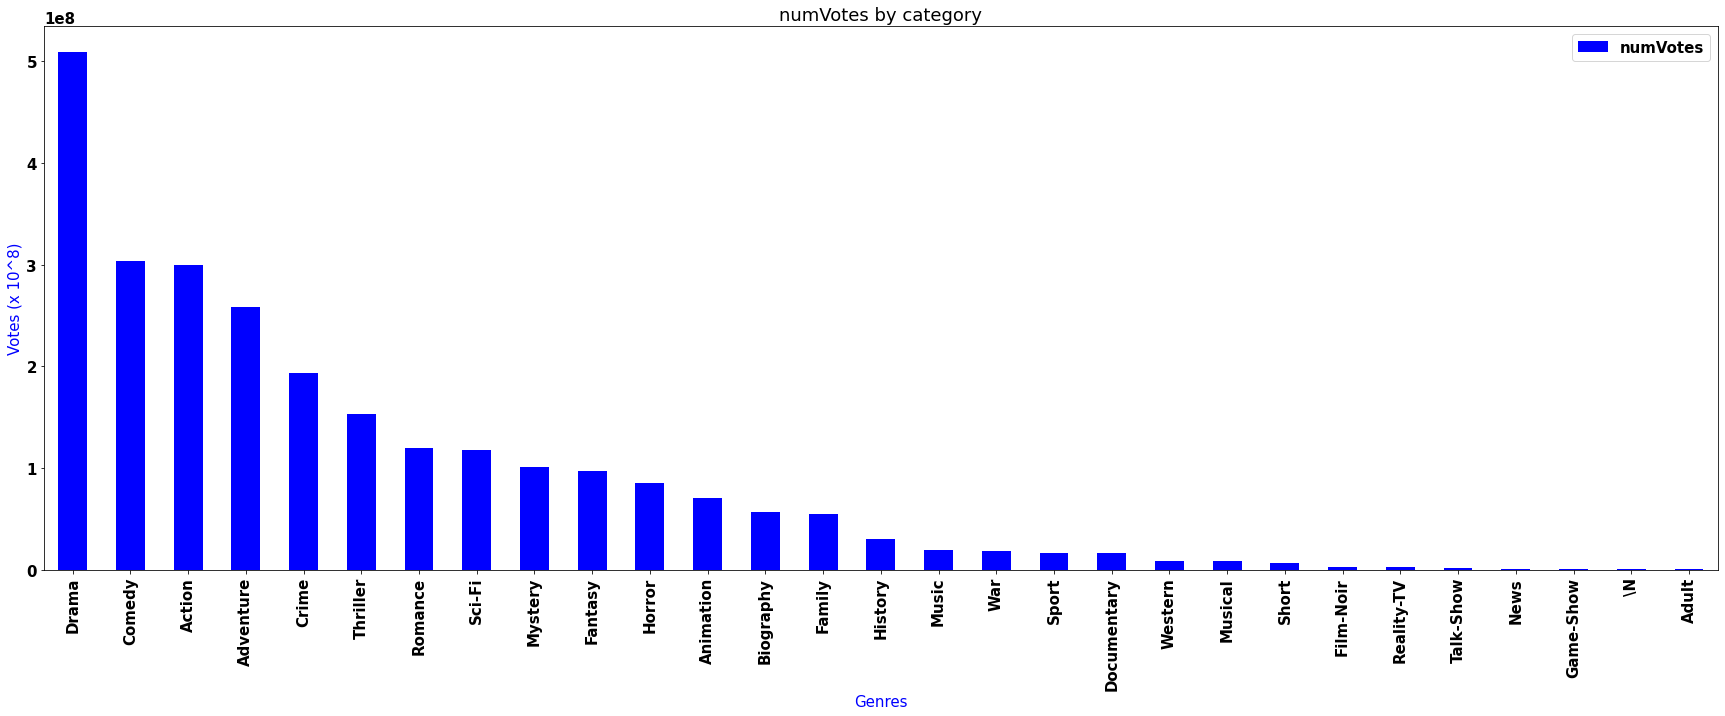

In [14]:
plt.rcParams.update({'font.size': 15,
                     'font.weight':'bold',
                    }) #setting size and weight

pl=genre_vote.plot(kind='bar',figsize=(30,10),title='numVotes by category',color='b') #for barplot generation
pl.set_xlabel('Genres', color='b')
pl.set_ylabel('Votes (x 10^8)' ,  color='b')

plt.show()

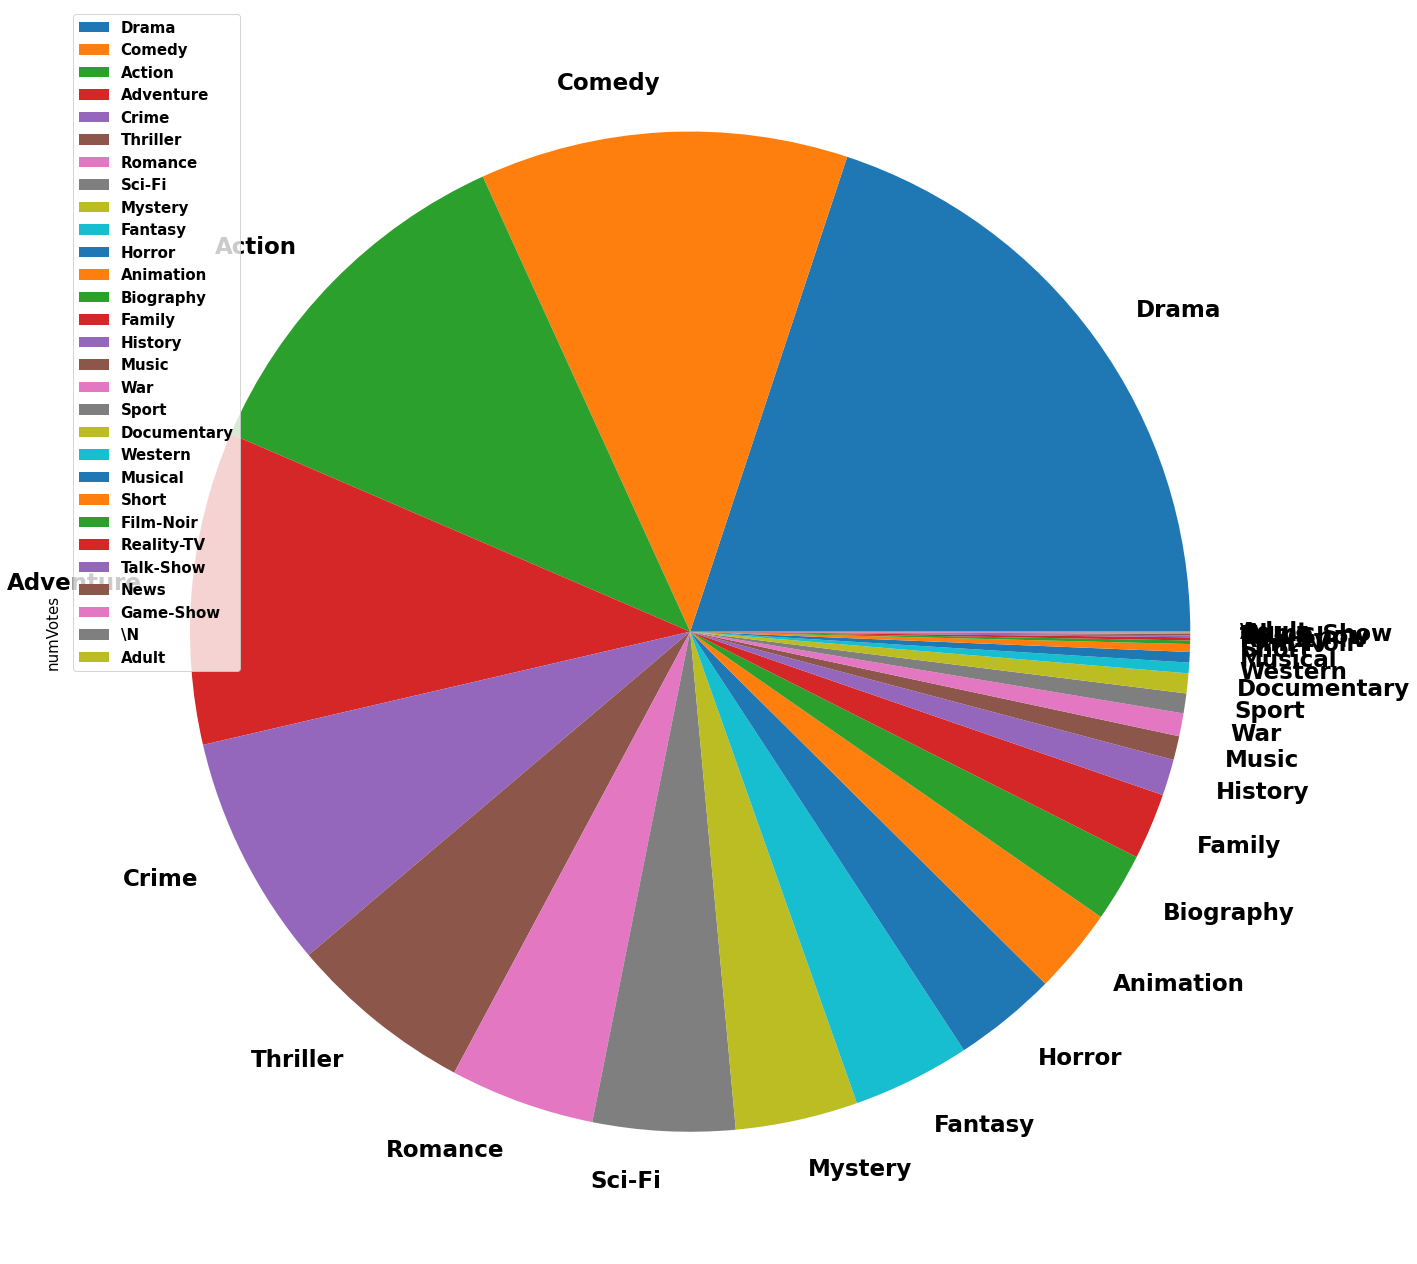

In [15]:
plot = genre_vote.plot.pie(y='numVotes', figsize=(23, 23),fontsize=23) #for piechart generation